In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import AvgPool2D, Conv2D, Dense, Flatten
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5),activation='tanh',input_shape=(32,32,1)))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(5,5),activation='tanh'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(120,kernel_size=(5,5),activation='tanh'))
model.add(Flatten())
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
data = tf.keras.datasets.fashion_mnist

In [ ]:
(train_img, train_lbl),(test_img, test_lbl) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_img = train_img.reshape(60000,28,28,1)
train_img = train_img/255.0

In [ ]:
test_img = test_img.reshape(10000,28,28,1)
test_img = test_img/255.0

In [ ]:
train_img = tf.image.pad_to_bounding_box(train_img,1,1,32,32)
test_img = tf.image.pad_to_bounding_box(test_img,1,1,32,32)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_img, train_lbl, epochs=10, validation_data = (test_img, test_lbl))

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.8135 - accuracy: 0.7135 - val_loss: 0.6136 - val_accuracy: 0.7717
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5473 - accuracy: 0.7987 - val_loss: 0.5344 - val_accuracy: 0.8020
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4813 - accuracy: 0.8257 - val_loss: 0.4839 - val_accuracy: 0.8208
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4411 - accuracy: 0.8414 - val_loss: 0.4549 - val_accuracy: 0.8363
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4147 - accuracy: 0.8511 - val_loss: 0.4332 - val_accuracy: 0.8426
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3955 - accuracy: 0.8574 - val_loss: 0.4146 - val_accuracy: 0.8488
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3801 - accuracy: 0.8626 - val_loss: 0.4039 - val_accuracy

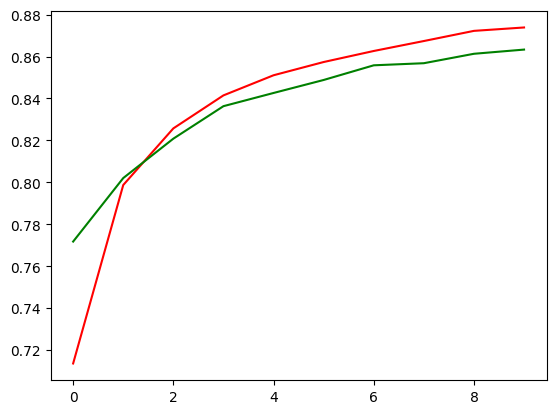

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r-')
plt.plot(history.history['val_accuracy'],'g-')
plt.show()

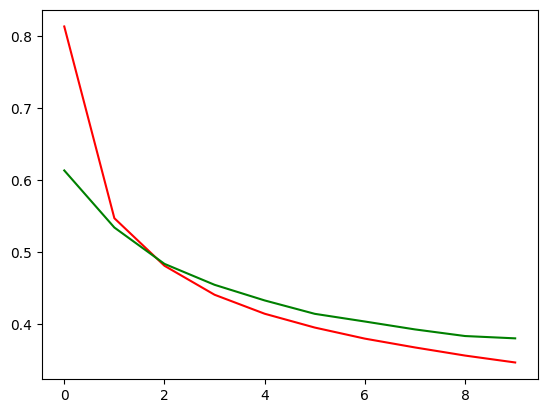

In [ ]:
plt.plot(history.history['loss'],'r-')
plt.plot(history.history['val_loss'],'g-')
plt.show()